In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

In [2]:
Features = pd.read_pickle('features')

In [3]:
Features['is_raining'] = Features['is_raining'].astype(int)
Features['is_workday'] = Features['is_workday'].astype(int)

In [4]:
Features

,start_time,Rides,Rides_last_hour,avg_tmp,is_raining,is_workday,season__1,season__2,season__3,hour__0,...,hour__13,hour__14,hour__15,hour__16,hour__17,hour__18,hour__19,hour__20,hour__21,hour__22
0,2018-01-01 00:00:00,7,7,-13.90,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2018-01-01 01:00:00,15,7,-15.00,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018-01-01 02:00:00,10,15,-15.60,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018-01-01 03:00:00,2,10,-16.70,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018-01-01 04:00:00,2,2,-17.20,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9356,2018-12-31 19:00:00,41,45,3.30,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9357,2018-12-31 20:00:00,28,41,3.60,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9358,2018-12-31 21:00:00,22,28,3.45,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9359,2018-12-31 22:00:00,25,22,3.30,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
# split the data into testing/training sets
X_train, X_test, y_train, y_test = train_test_split(Features.iloc[:, 2:], Features.iloc[:, 1], test_size=0.3)

# Linear Regression

In [6]:
# create linear regression object
model = LinearRegression()
# train the model using training sets
model.fit(X_train, y_train)

LinearRegression()

In [7]:
#show parameter values
print(f'Intercept: {model.intercept_}')

def print_coef():
    for i in range(len(model.coef_)):
        print(f'Theta {i+1}: {model.coef_[i]}')

print('\nCoefficients:')
print_coef()

Intercept: -67.32325754482372

Coefficients:
Theta 1: 0.8049255926398364
Theta 2: 2.4158874981536753
Theta 3: -12.058229533152286
Theta 4: 22.80135550606756
Theta 5: -28.528816833225022
Theta 6: -13.531702289934755
Theta 7: 16.05362119369151
Theta 8: 8.658815799458806
Theta 9: 20.587401119300548
Theta 10: 25.072474389967915
Theta 11: 31.660591590117836
Theta 12: 44.285251473076954
Theta 13: 108.81968782730841
Theta 14: 253.04666319779358
Theta 15: 448.6790858488241
Theta 16: 317.77867636426487
Theta 17: -183.93595020746832
Theta 18: 61.96651495359982
Theta 19: 210.17867844325414
Theta 20: 208.54157358594668
Theta 21: 138.1648567418374
Theta 22: 128.78550436314768
Theta 23: 243.25486324958095
Theta 24: 465.12831205533575
Theta 25: 461.47396783712117
Theta 26: -157.94466368625226
Theta 27: -84.53583651535607
Theta 28: -51.10187707261022
Theta 29: -0.6852319061735687
Theta 30: -0.17067321927830692


In [8]:
# make predictions using the testing set
y_pred = model.predict(X_test)

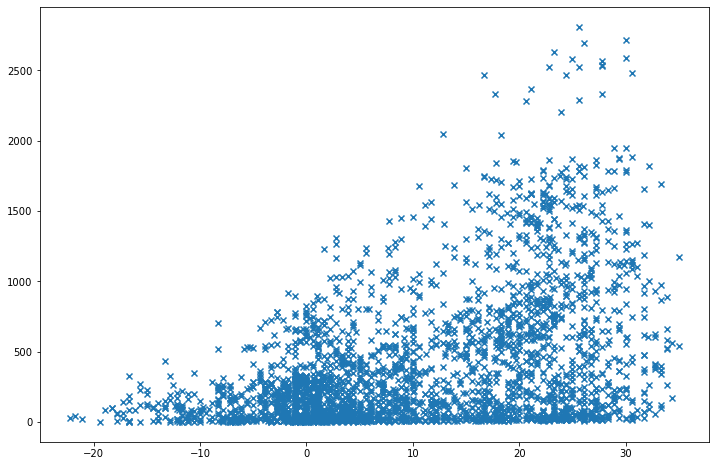

In [32]:
# plot the regression model
plt.figure(figsize=(12,8))

plt.scatter(X_test.iloc[:, 1], y_test, marker='x')

#plt.plot()

plt.show()

In [11]:
# evaluation metrics
print(f'Coefficient of determination: {r2_score(y_pred, y_test):.4f}')

print(f'Root mean squared error: {mean_squared_error(y_pred, y_test)**0.5:.4f}')

print(f'Mean absolute error: {mean_absolute_error(y_pred, y_test):.4f}')

Coefficient of determination: 0.8509
Root mean squared error: 170.9548
Mean absolute error: 114.6192


# Polynomial Regression

## to dos:
- plot regression line
- plot degree vs. rsme
- determine ideal degree value

In [6]:
#create polynomial linear regression object 
poly_model = PolynomialFeatures(degree=3)

In [7]:
# transform data
X_train_poly = poly_model.fit_transform(X_train)
X_test_poly = poly_model.fit_transform(X_test)

In [8]:
# train the model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [9]:
# make predictions using the testing set
y_pred = poly_model.predict(X_test_poly)

In [10]:
# evaluation metrics
print(f'Coefficient of determination: {r2_score(y_pred, y_test):.4f}')

print(f'Root mean squared error: {mean_squared_error(y_pred, y_test)**0.5:.4f}')

print(f'Mean absolute error: {mean_absolute_error(y_pred, y_test):.4f}')

Coefficient of determination: 0.9673
Root mean squared error: 85.4703
Mean absolute error: 42.5402


# Ridge Regression

## to dos:
- plot regression line
- plot alpha against RSME
- determine ideal value for alpha

In [33]:
#create ridge regression object 
ridge_model = Ridge(alpha = 1)

In [34]:
# train the model using training sets
ridge_model.fit(X_train_poly, y_train)

Ridge(alpha=1)

In [35]:
# make predictions using the testing set
y_pred = ridge_model.predict(X_test_poly)

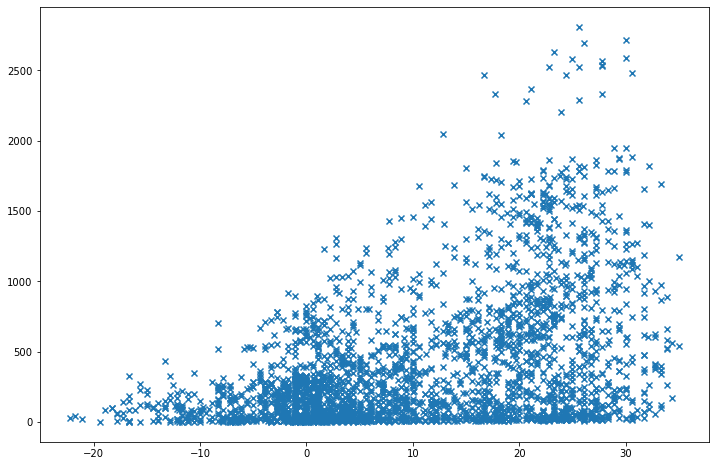

In [36]:
# plot the regression model
plt.figure(figsize=(12,8))

plt.scatter(X_test.iloc[:, 1], y_test, marker='x')

#plt.plot()

plt.show()

In [37]:
# evaluation metrics
print(f'Coefficient of determination: {r2_score(y_pred, y_test):.4f}')

print(f'Root mean squared error: {mean_squared_error(y_pred, y_test)**0.5:.4f}')

print(f'Mean absolute error: {mean_absolute_error(y_pred, y_test):.4f}')

Coefficient of determination: 0.9690
Root mean squared error: 81.9797
Mean absolute error: 41.5897
